In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mailbox

In [37]:
mboxfile = r"C:\Users\anilk\Downloads\mail_data.mbox"
mbox = mailbox.mbox(mboxfile)
mbox

In [38]:
# let's see the list of available keys:
for key in mbox[0].keys():
 print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
DKIM-Signature
From
Message-ID
Subject
MIME-Version
Content-Type
To
Date
X-LinkedIn-Class
X-LinkedIn-Template
X-LinkedIn-fbl
X-LinkedIn-Id
List-Unsubscribe
List-Unsubscribe-Post
Feedback-ID
Require-Recipient-Valid-Since


## Data Cleaning

In [40]:
import csv

In [41]:
with open('mailbox.csv', 'w', newline='', encoding='utf-8') as outputfile:
 writer = csv.writer(outputfile)
 writer.writerow(['subject','from','date','to','label','thread'])
 for message in mbox:
     writer.writerow([
     message['subject'],
     message['from'],
     message['date'],
     message['to'],
     message['X-Gmail-Labels'],
     message['X-GM-THRID']
     ])

Loading the CSV file

In [43]:
dfs = pd.read_csv('mailbox.csv')

In [44]:
dfs.head()

,subject,from,date,to,label,thread
0,Your application to Data Scientist at RoleChain,LinkedIn <jobs-noreply@linkedin.com>,"Tue, 11 Feb 2025 15:44:46 +0000 (UTC)",Anil Chitta <anilkumar369369@gmail.com>,"Archived,Category Updates,Unread,Jobs",1823776375865397637
1,Sr. Data Scientist - Part Time - Remote role a...,LinkedIn <jobs-listings@linkedin.com>,"Thu, 13 Feb 2025 03:20:50 +0000 (UTC)",Anil Chitta <anilkumar369369@gmail.com>,"Inbox,Category Social,Unread",1823910764724169800
2,Your application to Data Specialist at Capita,LinkedIn <jobs-noreply@linkedin.com>,"Tue, 11 Feb 2025 15:45:02 +0000 (UTC)",Anil Chitta <anilkumar369369@gmail.com>,"Archived,Category Updates,Unread,Jobs",1823776397235180355
3,=?UTF-8?Q?=E2=80=9Cdata_scientist=E2=80=9D:_Tr...,LinkedIn Job Alerts <jobalerts-noreply@linkedi...,"Thu, 13 Feb 2025 17:25:09 +0000 (UTC)",Anil Chitta <anilkumar369369@gmail.com>,"Archived,Category Updates,Unread,Jobs",1823963925713089399
4,Make extra cash with a side hustle,Upwork <upwork@email.upwork.com>,"Fri, 14 Feb 2025 05:19:04 +0000 (UTC)",anilkumar.369369@gmail.com,"Inbox,Category Promotions,Unread",1824008801750136271


In [45]:
dfs.dtypes

subject    object
from       object
date       object
to         object
label      object
thread      int64
dtype: object

Converting the date

In [47]:
# Note that a date field is an object. So, we need to convert it into a DateTime argument

dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

C:\Users\anilk\AppData\Local\Temp\ipykernel_44360\3583420591.py:3: UserWarning: Parsing dates in %d-DEC-%Y %H:%M:%m format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))
C:\Users\anilk\AppData\Local\Temp\ipykernel_44360\3583420591.py:3: UserWarning: Parsing dates in %d-MAY-%Y %H:%m:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))


Removing NaN values

In [49]:
dfs.isnull().sum()

subject    35
from        0
date       53
to         54
label       0
thread      0
dtype: int64

In [50]:
dfs = dfs[dfs['date'].notna()]

In [51]:
dfs.isnull().sum()

subject    22
from        0
date        0
to         54
label       0
thread      0
dtype: int64

In [52]:
dfs.to_csv('gmail.csv')

In [53]:
dfs.head()

,subject,from,date,to,label,thread
0,Your application to Data Scientist at RoleChain,LinkedIn <jobs-noreply@linkedin.com>,2025-02-11 15:44:46+00:00,Anil Chitta <anilkumar369369@gmail.com>,"Archived,Category Updates,Unread,Jobs",1823776375865397637
1,Sr. Data Scientist - Part Time - Remote role a...,LinkedIn <jobs-listings@linkedin.com>,2025-02-13 03:20:50+00:00,Anil Chitta <anilkumar369369@gmail.com>,"Inbox,Category Social,Unread",1823910764724169800
2,Your application to Data Specialist at Capita,LinkedIn <jobs-noreply@linkedin.com>,2025-02-11 15:45:02+00:00,Anil Chitta <anilkumar369369@gmail.com>,"Archived,Category Updates,Unread,Jobs",1823776397235180355
3,=?UTF-8?Q?=E2=80=9Cdata_scientist=E2=80=9D:_Tr...,LinkedIn Job Alerts <jobalerts-noreply@linkedi...,2025-02-13 17:25:09+00:00,Anil Chitta <anilkumar369369@gmail.com>,"Archived,Category Updates,Unread,Jobs",1823963925713089399
4,Make extra cash with a side hustle,Upwork <upwork@email.upwork.com>,2025-02-14 05:19:04+00:00,anilkumar.369369@gmail.com,"Inbox,Category Promotions,Unread",1824008801750136271


Applying descriptive statistics

In [55]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36884 entries, 0 to 36936
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  36862 non-null  object             
 1   from     36884 non-null  object             
 2   date     36884 non-null  datetime64[ns, UTC]
 3   to       36830 non-null  object             
 4   label    36884 non-null  object             
 5   thread   36884 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 2.0+ MB


In [56]:
dfs.head(10)

,subject,from,date,to,label,thread
0,Your application to Data Scientist at RoleChain,LinkedIn <jobs-noreply@linkedin.com>,2025-02-11 15:44:46+00:00,Anil Chitta <anilkumar369369@gmail.com>,"Archived,Category Updates,Unread,Jobs",1823776375865397637
1,Sr. Data Scientist - Part Time - Remote role a...,LinkedIn <jobs-listings@linkedin.com>,2025-02-13 03:20:50+00:00,Anil Chitta <anilkumar369369@gmail.com>,"Inbox,Category Social,Unread",1823910764724169800
2,Your application to Data Specialist at Capita,LinkedIn <jobs-noreply@linkedin.com>,2025-02-11 15:45:02+00:00,Anil Chitta <anilkumar369369@gmail.com>,"Archived,Category Updates,Unread,Jobs",1823776397235180355
3,=?UTF-8?Q?=E2=80=9Cdata_scientist=E2=80=9D:_Tr...,LinkedIn Job Alerts <jobalerts-noreply@linkedi...,2025-02-13 17:25:09+00:00,Anil Chitta <anilkumar369369@gmail.com>,"Archived,Category Updates,Unread,Jobs",1823963925713089399
4,Make extra cash with a side hustle,Upwork <upwork@email.upwork.com>,2025-02-14 05:19:04+00:00,anilkumar.369369@gmail.com,"Inbox,Category Promotions,Unread",1824008801750136271
5,=?UTF-8?Q?=E2=80=9Cbusiness_analysis_manag?=\n...,LinkedIn Job Alerts <jobalerts-noreply@linkedi...,2025-02-11 16:21:09+00:00,Anil Chitta <anilkumar369369@gmail.com>,"Archived,Category Updates,Unread,Jobs",1823778667194547562
6,"Anil Kumar Chitta, regarding your recent order...",Amazon Marketplace <marketplace-messages@amazo...,2025-02-11 13:20:35+00:00,anilkumar.369369@gmail.com,"Archived,Category Updates,Unread,Amazon",1823767302711394860
7,Thank you for applying to LivePerson,no-reply@liveperson.com,2025-02-08 05:15:02+00:00,anilkumar369369@gmail.com,"Trash,Opened,Category Updates",1823464962979764357
8,"Anil, your application was sent to Prudent Tec...",LinkedIn <jobs-noreply@linkedin.com>,2025-02-08 05:11:55+00:00,Anil Chitta <anilkumar369369@gmail.com>,"Archived,Category Updates,Unread,Jobs",1823464769139609415
9,"Anil, Got 5 seconds?...",Scaler <info@scaler.com>,2025-02-09 05:02:08+00:00,anilkumar.369369@gmail.com,"Archived,Category Updates,Unread,Scaler",1823554749055282060


# Data refactoring

In [58]:
# First of all, import the regular expression package:
import re

In [59]:
# a function that takes an entire string from any column and extracts an email address

def extract_email_ID(string):
 email = re.findall(r'<(.+?)>', string)
 if not email:
     email = list(filter(lambda y: '@' in y, string.split()))
 return email[0] if email else np.nan

In [60]:
#let's apply the function to the from column

dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))

In [61]:
# we are going to refactor the label field. The logic is simple. If an email is
# from your email address, then it is the sent email. Otherwise, it is a received
# email, that is, an inbox email

myemail = 'anilkumar.369369@gmail.com'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

# Dropping columns

In [63]:
# Note that the to column only contains your own email. So, we can drop this irrelevant column:
dfs.drop(columns='to', inplace=True)

In [64]:
dfs.head()

,subject,from,date,label,thread
0,Your application to Data Scientist at RoleChain,jobs-noreply@linkedin.com,2025-02-11 15:44:46+00:00,inbox,1823776375865397637
1,Sr. Data Scientist - Part Time - Remote role a...,jobs-listings@linkedin.com,2025-02-13 03:20:50+00:00,inbox,1823910764724169800
2,Your application to Data Specialist at Capita,jobs-noreply@linkedin.com,2025-02-11 15:45:02+00:00,inbox,1823776397235180355
3,=?UTF-8?Q?=E2=80=9Cdata_scientist=E2=80=9D:_Tr...,jobalerts-noreply@linkedin.com,2025-02-13 17:25:09+00:00,inbox,1823963925713089399
4,Make extra cash with a side hustle,upwork@email.upwork.com,2025-02-14 05:19:04+00:00,inbox,1824008801750136271


# Refactoring timezones

In [66]:
# We can refactor timezones by using the method given here:

import datetime
import pytz

def refactor_timezone(x):
 est = pytz.timezone('US/Eastern')
 return x.astimezone(est)

In [67]:
# Now that our function is created, let's call it:
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))

In [68]:
# convert the 'date' variable into the name of the day, as in, Saturday, Sunday, and so on
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.day_name())
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

In [69]:
# we do the same process for the time of the day
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [70]:
# we refactor the hour
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [71]:
# Refactor the year integer
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [72]:
# refactor the year fraction
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [73]:
# Having done that, we can set the date to index and we will no longer require the
# original date field. So, we can remove that

dfs.index = dfs['date']
del dfs['date']

In [74]:
dfs.tail(10)

,subject,from,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,
2023-05-15 04:52:22-04:00,Unlock Free Spotify Premium with your purchase...,order-update@amazon.in,inbox,1765949563619811023,Monday,4.872778,4,2023,2023.369610
2024-08-04 00:15:11-04:00,Delivered: Your Amazon package has been delive...,order-update@amazon.in,inbox,1806428968389128009,Sunday,0.253056,0,2024,2024.594114
2024-01-17 23:18:16-05:00,Urgent Hiring for Delivery Manager at Tata Con...,jobs@jobsalert.shine.com,inbox,1788400367227914390,Wednesday,23.304444,23,2024,2024.046543
2023-11-23 04:55:58-05:00,"Anil, start a conversation with your new conne...",invitations@linkedin.com,inbox,1783348184021878794,Thursday,4.932778,4,2023,2023.895277
2025-02-06 03:20:52-05:00,=?UTF-8?Q?You_have_an_invitation_=E2=9C=89=EF=...,invitations@linkedin.com,inbox,1823295461947411051,Thursday,3.347778,3,2025,2025.101300
2024-05-03 08:40:05-04:00,Blockbuster Deals | Great Summer Sale,store-news@amazon.in,inbox,1798035216760780842,Friday,8.668056,8,2024,2024.339493
2024-10-06 04:29:45-04:00,=?UTF-8?Q?Unwrap_the_Savings_=F0=9F=8E=81_=F0=...,service@lenskart.in,inbox,1812152592996681436,Sunday,4.495833,4,2024,2024.766598
2024-02-15 02:52:00-05:00,=?UTF-8?Q?30+_new_jobs_for_=E2=80=9Cbusiness_a...,jobalerts-noreply@linkedin.com,inbox,1790950531194074202,Thursday,2.866667,2,2024,2024.125941
2024-09-03 09:51:36-04:00,=?UTF-8?Q?=E2=80=9Cdata_scientist=E2=80=9D:_NN...,jobalerts-noreply@linkedin.com,inbox,1809183145525395743,Tuesday,9.860000,9,2024,2024.676249


# Data analysis

In [76]:
# How many emails did I send during a given timeframe?

print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs['label'].value_counts())

Thu, 28 Feb 2008 10:24 AM
Fri, 14 Feb 2025 01:44 PM
label
inbox    36111
sent       773
Name: count, dtype: int64


# At what times of the day do I send and receive emails with Gmail?

In [78]:
# Let's create two sub-dataframe—one for sent emails and another for received emails:

sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

In [79]:
# let's import the required libraries

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [80]:
# let's create a function that takes a dataframe as an input and creates a plot

def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
 ind = np.zeros(len(df), dtype='bool')
 est = pytz.timezone('US/Eastern')
 df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
 ax.set_ylim(0, 24)
 ax.yaxis.set_major_locator(MaxNLocator(8))
 ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
 ax.set_xlabel('')
 ax.set_ylabel('')
 ax.set_title(title)
 ax.grid(ls=':', color='k')
 return ax

C:\Users\anilk\AppData\Local\Temp\ipykernel_44360\3672467445.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
C:\Users\anilk\AppData\Local\Temp\ipykernel_44360\3672467445.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);


<Axes: title={'center': 'Received'}>

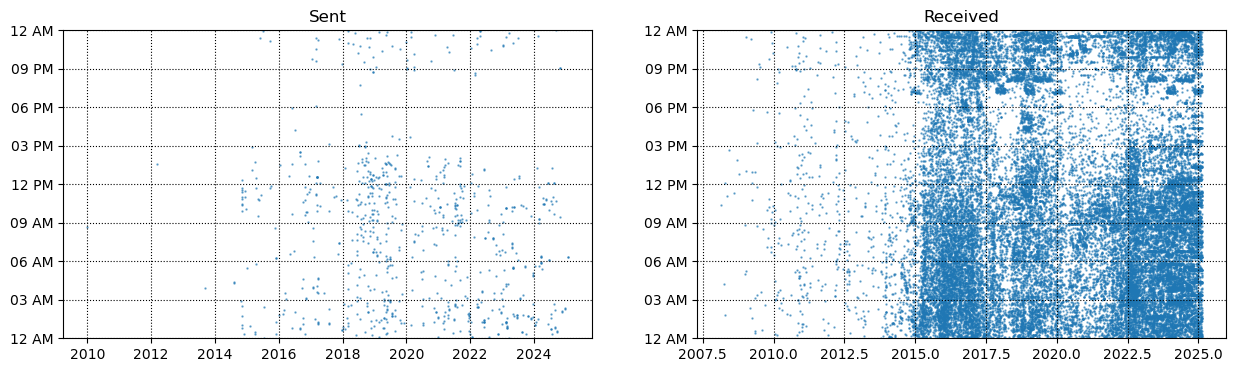

In [81]:
# let's plot both received and sent emails

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

# Average emails per day and hour

In [83]:
# creates a function that plots the average number of emails per day

def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
 year = df[df['year'].notna()]['year'].values
 T = year.max() - year.min()
 bins = int(T / dt)
 weights = 1 / (np.ones_like(year) * dt * 365.25)
 ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
 ax.grid(ls=':', color='k')

In [84]:
# create a function that plots the average number of emails per hour

from scipy import ndimage

def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
                      weight_fun=None, **plot_kwargs):

    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);


    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);

In [85]:
# create a class that plots the time of the day versus year for all the emails within the given timeframe

class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])  
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
    plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
    self.ax2.set_xlabel('Average emails per hour')
    plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
    self.ax3.set_ylabel('Average emails per day')

C:\Users\anilk\AppData\Local\Temp\ipykernel_44360\3672467445.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
C:\Users\anilk\AppData\Local\Temp\ipykernel_44360\55723284.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
C:\Users\anilk\AppData\Local\Temp\ipykernel_44360\3672467445.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
C:\Users\anilk\AppData\Local\Temp\ipykernel_44360\55723284.py:3

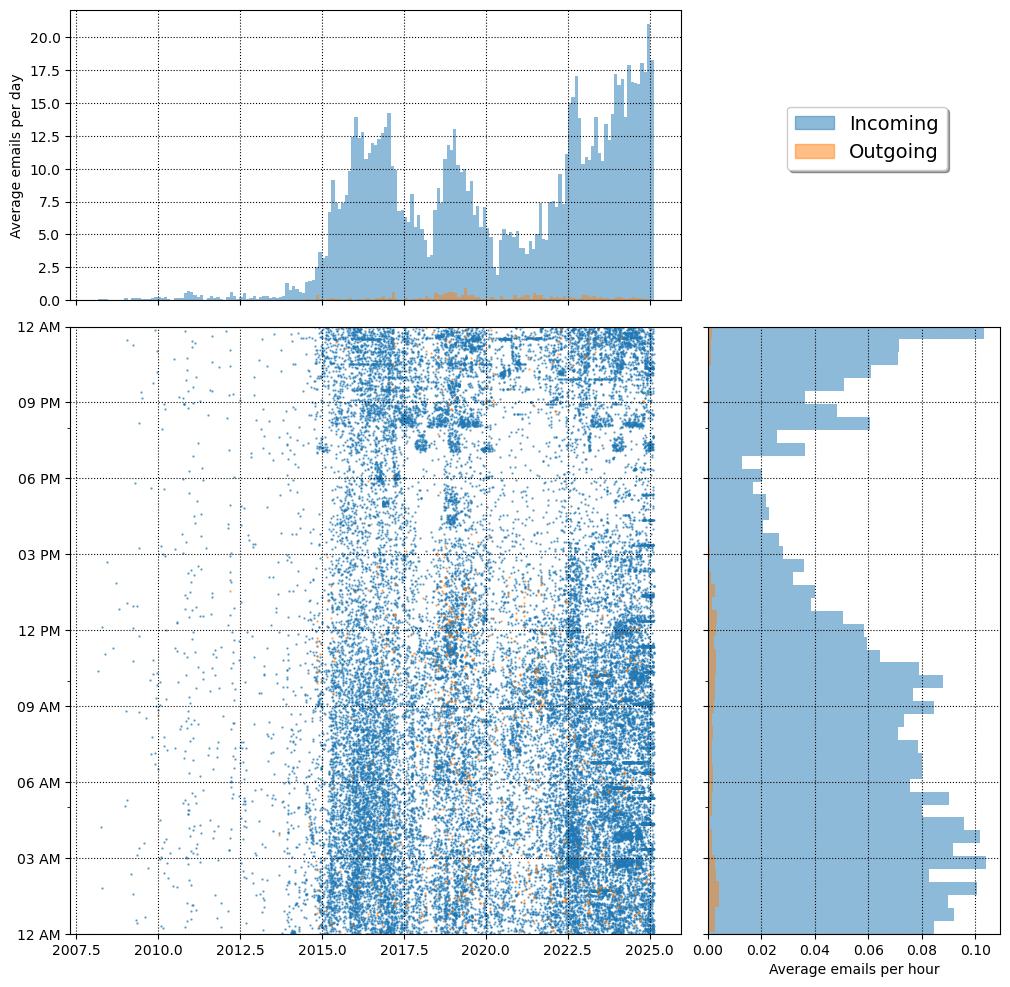

In [86]:
# let's instantiate the class to plot the graph

import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
plt.figure(figsize=(12,12));
tpl = TriplePlot()
tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True)

<Axes: xlabel='dayofweek'>

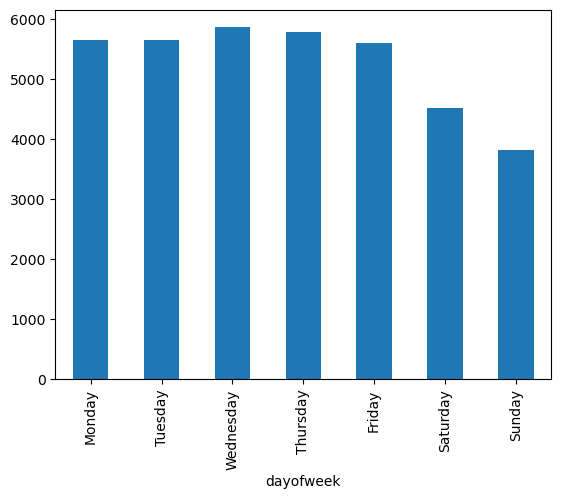

In [87]:
# Let's find the busiest day of the week in terms of emails
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

C:\Users\anilk\AppData\Local\Temp\ipykernel_44360\221127094.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sdw = sent.groupby('dayofweek').size() / len(sent)
C:\Users\anilk\AppData\Local\Temp\ipykernel_44360\221127094.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rdw = received.groupby('dayofweek').size() / len(received)


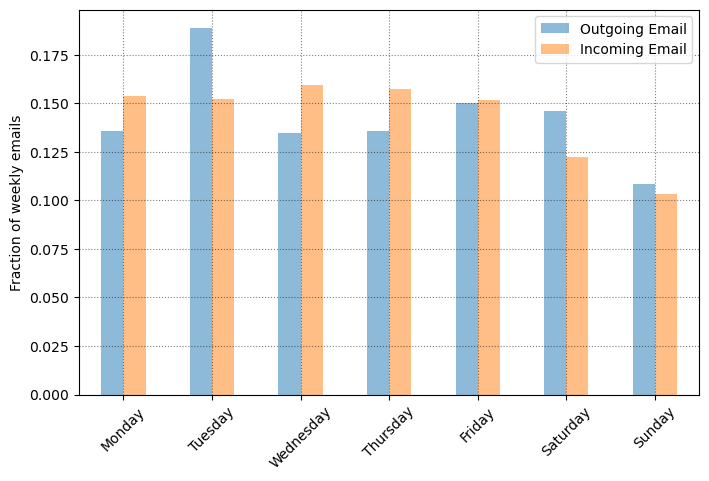

In [88]:
# Let's go one step further and see the most active days for receiving and sending emails separately

sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)
df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

C:\Users\anilk\AppData\Local\Temp\ipykernel_44360\55723284.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
C:\Users\anilk\AppData\Local\Temp\ipykernel_44360\55723284.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
C:\Users\anilk\AppData\Local\Temp\ipykernel_44360\55723284.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
C:\Users\anilk\AppData\Local\Temp\ipykernel_44360\55723284.py:34: UserWarning: set_ticklabels() should only be used with 

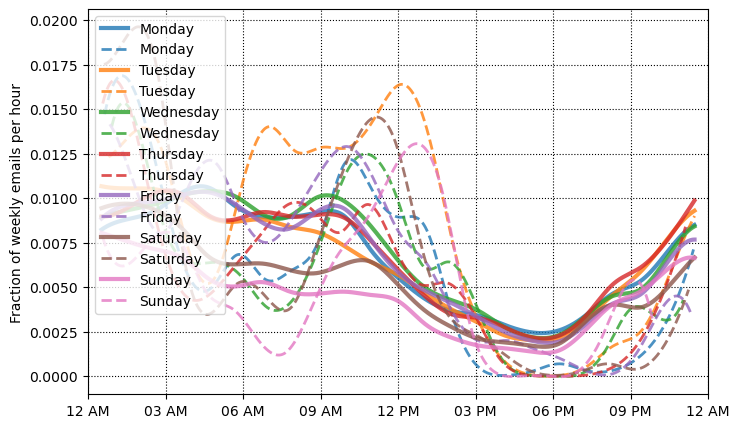

In [89]:
# Let's find the most active time of day for email communication

import scipy.ndimage
from scipy.interpolate import interp1d

plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayofweek.cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayofweek']==dow]
    weights = np.ones(len(df_s)) / len(sent)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(loc='upper left')

# Most frequently used words

In [91]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [92]:
from wordcloud import WordCloud
df_no_arxiv = dfs[dfs['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, sent['subject'].values))

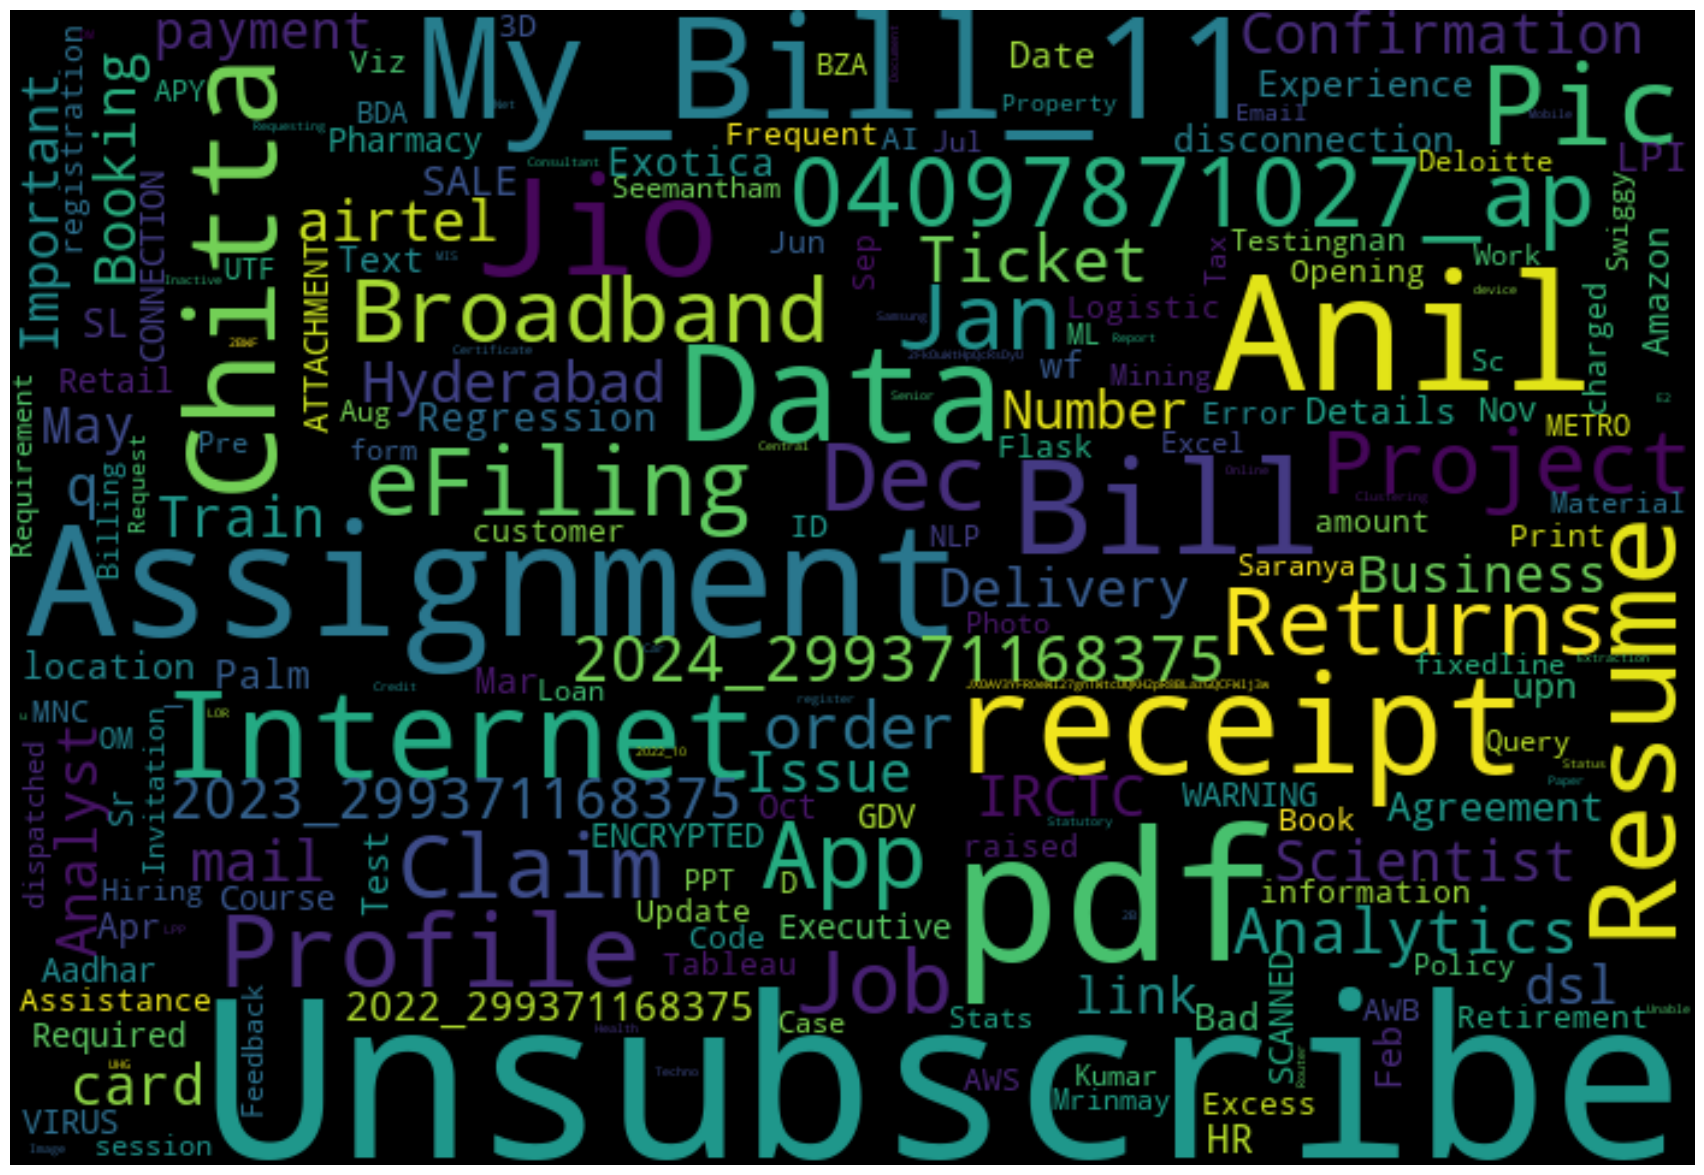

In [139]:
# let's plot the word cloud
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
 wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)
plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)